# **Data Engineering**
This notebook demonstrates essential data preprocessing techniques using the Pandas library that are important for a data engineer.

Preprocessing is a critical step in preparing raw data for analysis or machine learning.

### Topics Covered in this notebook:
1. Handling Missing Data
2. Removing Duplicates
4. Encoding Categorical Variables
5. Feature Scaling
6. Feature Engineering

## **Importing Libraries**
Let us first import all the relevant Python libraries required:
1. **pandas :** for data manipulation and analysis
2. **numpy :** for numerical computations
3. **matplotlib :** for data visualization
4. **seaborn :** for enhanced data visualization
5. **kagglehub :** for accessing datasets and other resources from Kaggle
6. **os :** for interacting with the operating system


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

Now that we have imported the required libraries, let us load a dataset from Kaggle. We will be using the Titinic Dataset in today's exercise.

## **Loading A Dataset**

In [2]:
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [3]:
dataset_path = "/root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1"

files = os.listdir(dataset_path)
print(files)


['Titanic-Dataset.csv']


In [4]:
file_path = "/root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv"

df = pd.read_csv(file_path)

Now that the dataset has been loaded, let us now visualize the dataset and it's structure.

In [5]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


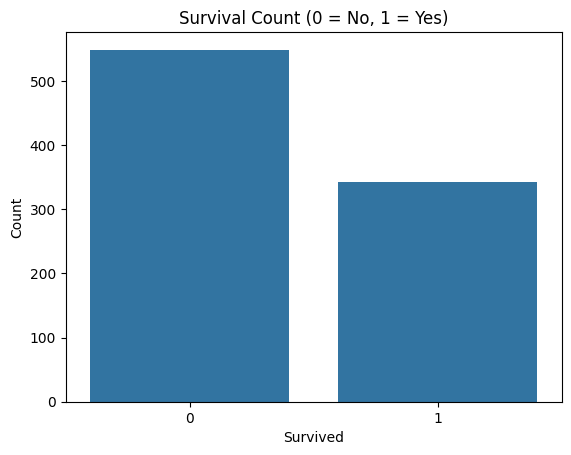

In [8]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [9]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## **Missing Data**

**Handling Missing Data**
Missing data is a common issue that can compromise the quality of analysis and model performance. Below are some of the commonly used techniques for handling missing data:


1.   Deleting all instances contaning missing values
2.   Replacing the missing values with mean/median/mode value



### **Deleting**
*   Drop Rows (df.dropna()): Remove rows with missing values.
*   Drop Columns (df.dropna(axis=1)): Remove columns with too many missing values.



In [10]:
# @title **Dropping rows with missing values**

#Let's create a copy of the dataset as we will explore different methods to handle missing values.

df_delete = df.copy()
print(df_delete.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
df_delete_cleaned = df_delete.dropna()

print(df_delete_cleaned.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## **Replacing**

In [12]:
# @title **Replacing missing instances with mean/median/mode values**

df_replace = df.copy()
print(df_replace.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# @title **Replacing Missing Values in "Age" with the Mean value**

# Calculate the mean of the 'Age' column
mean_age = df_replace['Age'].mean()

# Replace missing values in 'Age' with the mean value (without using inplace=True)
df_replace['Age'] = df_replace['Age'].fillna(mean_age)

# Verify the result
print(df_replace['Age'].isnull().sum())



0


## **Duplicate Data**

In [14]:

print(df.duplicated().sum())

0


As the output is 0, that means there are no duplicate values. If there were any duplicates, then we would have dropped them.

## **Encoding Categorical Variables**

In [15]:
# @title **Label Encoding**
df_encode = df.copy()

# Encoding: Male = 0, Female = 1
df_encode['Sex'] = df_encode['Sex'].map({'male': 0, 'female': 1})

# Display the updated DataFrame
print(df_encode[['Sex']].head())



   Sex
0    0
1    1
2    1
3    1
4    0


In [16]:
# @title **One-Hot Encoding**

df_onehot = df.copy()

# Apply One-Hot Encoding to the 'Embarked' column on the copied DataFrame
df_onehot = pd.get_dummies(df_onehot, columns=['Embarked'], drop_first=True)

# Convert Boolean values to integers (0 or 1)
df_onehot[['Embarked_Q', 'Embarked_S']] = df_onehot[['Embarked_Q', 'Embarked_S']].astype(int)

# Display the updated DataFrame
print(df_onehot.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN           0           1  
1      0          PC 17599  71.2833   C85           0           0  
2      0  STON/O2. 3101282   7.9250   NaN           0           1  
3      0            113803  53.1000  C123       

## **Feature Engineering**

In [17]:
# Create a copy of the DataFrame
df_family_size = df.copy()

# Create a 'Family Size' feature by combining 'SibSp' (siblings/spouses aboard) and 'Parch' (parents/children aboard)
df_family_size['Family Size'] = df_family_size['SibSp'] + df_family_size['Parch'] + 1  # Adding 1 to include the passenger themselves

# Display the updated DataFrame with the new 'Family Size' feature
print(df_family_size[['SibSp', 'Parch', 'Family Size']].head())


   SibSp  Parch  Family Size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


## **JOIN Operation**
In Pandas, the equivalent of a SQL JOIN operation is the merge() function.

For demonstration, let's create a second DataFrame df_passenger_info containing additional information about passengers, and we want to join it with the original Titanic dataset on a common column such as "PassengerId".

In [18]:
# @title **Example: Join Titanic Data with Additional Info**
# Create a sample additional DataFrame (it might come from another data source)
df_passenger_info = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4, 5],
    'Cabin': ['C85', 'C123', 'E46', 'G6', 'B28'],
    'Embarked': ['S', 'C', 'Q', 'S', 'C']
})

# Perform a left join between the Titanic dataset and df_passenger_info
df_merged = pd.merge(df, df_passenger_info, on='PassengerId', how='left')

# Display the first few rows of the merged DataFrame
df_merged.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_x,Embarked_x,Cabin_y,Embarked_y
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C123,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,E46,Q
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,G6,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,B28,C


Here, pd.merge() is used to perform a SQL-like LEFT JOIN between df (Titanic dataset) and df_passenger_info on the "PassengerId" column. The resulting DataFrame will have both the original Titanic dataset and the additional passenger information (e.g., Cabin, Embarked).

## **GroupBy**
The groupby() function in Pandas is used to group the data based on one or more columns and then perform aggregation operations on them. Let's group the data by the "Pclass" (Passenger Class) and calculate the average age and survival rate.

In [19]:
# @title **Example: GroupBy Pclass and Aggregate Data**
# Group by Pclass and calculate mean Age and Survived
grouped = df.groupby('Pclass')[['Age', 'Survived']].mean()

# Display the result
grouped


,Age,Survived
Pclass,,
1,38.233441,0.629630
2,29.877630,0.472826
3,25.140620,0.242363


In [20]:
# @title **Example: GroupBy and Apply Multiple Aggregations**
# Group by Pclass and calculate both the mean and count for Age and Survived
grouped_multiple = df.groupby('Pclass')[['Age', 'Survived']].agg(['mean', 'count'])

# Display the result
grouped_multiple


Age        Survived      
             mean count      mean count
Pclass                                 
1       38.233441   186  0.629630   216
2       29.877630   173  0.472826   184
3       25.140620   355  0.242363   491

## **Lambda Functions with apply()**
We can use Lambda functions within the apply() function to apply custom operations to each element in a column. For example, we can classify passengers as "Minor" or "Adult" based on their Age.

In [21]:
# @title **Example: GroupBy and Apply Multiple Aggregations**
# Create a new column 'Age_Group' using a lambda function
df['Age_Group'] = df['Age'].apply(lambda x: 'Minor' if x < 18 else 'Adult')

# Display the first few rows
df[['Age', 'Age_Group']].head()


,Age,Age_Group
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


In [22]:
# @title **Example: Combine Multiple Columns Using Lambda**
# Create a new column 'Family_Size' by adding SibSp and Parch
df['Family_Size'] = df.apply(lambda row: row['SibSp'] + row['Parch'], axis=1)

# Display the first few rows
df[['SibSp', 'Parch', 'Family_Size']].head()


,SibSp,Parch,Family_Size
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [23]:
 # @title **Example: Lambda Function for Fare Classification**
 # Define the Fare thresholds
fare_category = lambda fare: 'Low' if fare < 20 else ('Medium' if fare <= 50 else 'High')

# Create a new Fare_Category column using apply() with lambda function
df['Fare_Category'] = df['Fare'].apply(fare_category)

# Display the first 5 rows showing the Fare and Fare_Category
print(df[['Fare', 'Fare_Category']].head())

      Fare Fare_Category
0   7.2500           Low
1  71.2833          High
2   7.9250           Low
3  53.1000          High
4   8.0500           Low


In [24]:
 # @title **Example: Combining Multiple Aggregations and Lambda Functions**
grouped_df = df.groupby('Pclass')['Fare'].agg(['mean'])

# Use a lambda function to categorize the average Fare into 'Low', 'Medium', 'High'
grouped_df['Fare_Category'] = grouped_df['mean'].apply(fare_category)

# Display the results
print(grouped_df)

             mean Fare_Category
Pclass                         
1       84.154687          High
2       20.662183        Medium
3       13.675550           Low


In [25]:
 # @title **Example: Extract Title from Name**
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Display the first 5 rows showing the Name and Title
print(df[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [26]:
 # @title **Example: Deck Extraction from Cabin**

df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')

# Display the first 5 rows showing the Deck and Cabin
print(df[['Deck', 'Cabin']].head())

      Deck Cabin
0  Unknown   NaN
1        C   C85
2  Unknown   NaN
3        C  C123
4  Unknown   NaN


### **Now let us combine all the above into an ETL pipeline**

In [27]:
def extract(dataset_path):

    file_path = dataset_path
    df = pd.read_csv(file_path)

    df_passenger_info = pd.DataFrame({
      'PassengerId': [1, 2, 3, 4, 5],
      'Cabin': ['C85', 'C123', 'E46', 'G6', 'B28'],
      'Embarked': ['S', 'C', 'Q', 'S', 'C']
    })

    return df, df_passenger_info

def transform(df, df_passenger_info):
    # Handling Missing Data (example using mean for age)
    df['Age'] = df['Age'].fillna(df['Age'].mean())

    # Encoding (example: label encoding for Sex)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

    df['Age_Group'] = df['Age'].apply(lambda x: 'Minor' if x < 18 else 'Adult')

    # Feature Engineering (example: Family size)
    df['Family_Size'] = df.apply(lambda row: row['SibSp'] + row['Parch'], axis=1)

    # Example of using a lambda function for fare classification
    fare_category = lambda fare: 'Low' if fare < 20 else ('Medium' if fare <= 50 else 'High')
    df['Fare_Category'] = df['Fare'].apply(fare_category)

    # Example of Combining Multiple Aggregations and Lambda Functions**
    grouped_df = df.groupby('Pclass')['Fare'].agg(['mean'])
    grouped_df['Fare_Category'] = grouped_df['mean'].apply(fare_category)

    # **Extract Title from Name**
    df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

    # **Deck Extraction from Cabin**
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')

    # Perform a left join between the Titanic dataset and df_passenger_info
    df_merged = pd.merge(df, df_passenger_info, on='PassengerId', how='left')

    return df_merged

def load(df, output_path):
    #df.to_csv(output_path, index=False)
    print("Data saved")
    return df


def ETL(dataset_path, output_path):
    df, df_passenger_info = extract(dataset_path)
    df_transformed = transform(df, df_passenger_info)
    df_loaded = load(df_transformed, output_path)

    return df_loaded



In [28]:
# Example usage:

dataset_path = "/root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv"
output_path = "define a path"

df = ETL(dataset_path, output_path)
df.head()

Data saved


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_x,Embarked_x,Age_Group,Family_Size,Fare_Category,Title,Deck,Cabin_y,Embarked_y
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1,Low,Mr,Unknown,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,High,Mrs,C,C123,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,Low,Miss,Unknown,E46,Q
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adult,1,High,Mrs,C,G6,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adult,0,Low,Mr,Unknown,B28,C
